In [255]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager
font_dirs = ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

import seaborn as sns
sns.set(font='AppleGothic')

<ipython-input-256-d2ab554532d8>:8: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [257]:
# title 공백 없애주는 함수
def title_strip(title):
    return title.strip()

In [258]:
import pickle

with open('data/every_weekly_webtoon.pkl', 'rb') as f:
    weekly_df = pickle.load(f)
    
with open('data/every_yearly_webtoon.pkl', 'rb') as f:
    yearly_df = pickle.load(f)

In [259]:
# genre를 두 개로 나눠주는 함수
def split_genre1(genre):
    return genre.split()[0]

def split_genre2(genre):
    return genre.split()[1]

In [260]:
yearly_df.drop(columns='link', axis=1, inplace=True)

yearly_df['title'] = yearly_df['title'].apply(title_strip)
yearly_df['img'] = yearly_df['img'].astype('int')
yearly_df['person'] = yearly_df['person'].astype('int')
yearly_df['date'] = pd.to_datetime(yearly_df['date'], format='%Y-%m-%d', errors='raise')

yearly_df.rename(columns={'date':'datetime'}, inplace=True)

yearly_df.head()

,year,title,genre,star,img,person,datetime
0,2005,골방환상곡,에피소드 일상,9.86,1,3454,2008-12-24
1,2005,골방환상곡,에피소드 일상,9.81,1,2220,2008-11-04
2,2005,골방환상곡,에피소드 일상,9.81,1,1763,2008-09-08
3,2005,골방환상곡,에피소드 일상,9.85,1,1599,2008-05-02
4,2005,골방환상곡,에피소드 일상,9.88,1,1810,2008-04-30


In [261]:
yearly_df['date_year'] = yearly_df['datetime'].dt.year
yearly_df['quarter'] = yearly_df['datetime'].dt.quarter
yearly_df['month'] = yearly_df['datetime'].dt.month
yearly_df['day'] = yearly_df['datetime'].dt.day

yearly_df = yearly_df[['year', 'title', 'genre','star', 'img', 'person', 'datetime', 'date_year', 'quarter', 'month', 'day']]
print(yearly_df.shape)
yearly_df

(331255, 11)


,year,title,genre,star,img,person,datetime,date_year,quarter,month,day
0,2005,골방환상곡,에피소드 일상,9.86,1,3454,2008-12-24,2008,4,12,24
1,2005,골방환상곡,에피소드 일상,9.81,1,2220,2008-11-04,2008,4,11,4
2,2005,골방환상곡,에피소드 일상,9.81,1,1763,2008-09-08,2008,3,9,8
3,2005,골방환상곡,에피소드 일상,9.85,1,1599,2008-05-02,2008,2,5,2
4,2005,골방환상곡,에피소드 일상,9.88,1,1810,2008-04-30,2008,2,4,30
...,...,...,...,...,...,...,...,...,...,...,...
331250,2021,9등급 뒤집기,스토리 드라마,9.67,44,4916,2020-01-16,2020,1,1,16
331251,2021,9등급 뒤집기,스토리 드라마,9.68,40,3802,2020-01-09,2020,1,1,9
331252,2021,9등급 뒤집기,스토리 드라마,9.53,46,5076,2020-01-02,2020,1,1,2
331253,2021,9등급 뒤집기,스토리 드라마,8.89,64,7815,2019-12-26,2019,4,12,26


In [262]:
# genre를 두 개로 나눠주는 함수
def split_genre1(genre):
    return genre.split()[0]

def split_genre2(genre):
    return genre.split()[1]

In [263]:
yearly_df['genre1'] = yearly_df['genre'].apply(split_genre1)
yearly_df['genre2'] =yearly_df['genre'].apply(split_genre2)

In [264]:
yearly_df = yearly_df[[
    'year', 'title', 'genre', 'genre1', 'genre2', 'star', 'img', 'person', 'datetime', 'date_year', 'quarter', 'month', 'day']]

In [265]:
yearly_df

,year,title,genre,genre1,genre2,star,img,person,datetime,date_year,quarter,month,day
0,2005,골방환상곡,에피소드 일상,에피소드,일상,9.86,1,3454,2008-12-24,2008,4,12,24
1,2005,골방환상곡,에피소드 일상,에피소드,일상,9.81,1,2220,2008-11-04,2008,4,11,4
2,2005,골방환상곡,에피소드 일상,에피소드,일상,9.81,1,1763,2008-09-08,2008,3,9,8
3,2005,골방환상곡,에피소드 일상,에피소드,일상,9.85,1,1599,2008-05-02,2008,2,5,2
4,2005,골방환상곡,에피소드 일상,에피소드,일상,9.88,1,1810,2008-04-30,2008,2,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331250,2021,9등급 뒤집기,스토리 드라마,스토리,드라마,9.67,44,4916,2020-01-16,2020,1,1,16
331251,2021,9등급 뒤집기,스토리 드라마,스토리,드라마,9.68,40,3802,2020-01-09,2020,1,1,9
331252,2021,9등급 뒤집기,스토리 드라마,스토리,드라마,9.53,46,5076,2020-01-02,2020,1,1,2
331253,2021,9등급 뒤집기,스토리 드라마,스토리,드라마,8.89,64,7815,2019-12-26,2019,4,12,26


In [266]:
def yearly_month_genre(months):
    result_df = yearly_df[yearly_df['month'] == months]
    person_mean = result_df.groupby('title').agg('mean').round(2)[['person']].reset_index()
    result_s = result_df.groupby(['title','genre2']).size().reset_index()
    result_s.drop(columns = 0, axis=1, inplace=True)
    month_genre = pd.concat([result_s, person_mean['person']], axis = 1, join="inner")
    month_genre = month_genre.groupby('genre2').agg('mean').round(2)[['person']].reset_index()
    month_genre.sort_values('person', ascending=False, inplace=True)
    return month_genre

In [267]:
month_genres = []
for a in range(1, 13):
    r = yearly_month_genre(a)
    month_genres.append(r)
    
df = pd.DataFrame()
for i in range(len(month_genres)):
    df = pd.concat([df, month_genres[i]['person']],1) 

In [268]:
df.columns = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
df

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,15317.76,7976.49,8588.34,5455.94,11225.87,6524.92,7548.91,8289.16,9667.11,8670.47,6696.64,8647.76
1,14650.56,12410.42,12843.28,12480.27,13561.07,15034.20,11974.86,12107.52,14935.89,14907.48,16701.94,13278.48
2,13248.39,11909.38,11062.90,13310.76,17121.28,15078.60,15059.95,14329.63,13376.36,13107.32,13696.87,14432.99
3,12498.74,11372.14,11724.64,13500.42,16371.00,17413.37,15199.04,15018.09,14031.39,13574.50,12320.86,14067.84
4,8400.05,7788.02,7595.43,9586.75,12346.79,12654.94,14620.71,14188.18,10904.75,10187.64,10558.93,9415.39
5,6718.05,5860.80,5281.97,4994.11,5312.17,5029.68,5577.67,5644.19,5733.99,6231.69,5726.94,7161.95
6,4912.80,6855.93,6021.88,10252.11,6548.20,5661.91,7059.57,6655.80,5430.46,5241.10,3905.15,4557.98
7,11489.22,9978.83,11071.45,10290.65,17260.38,13357.50,12101.18,11748.94,11569.53,11345.78,10211.61,11069.53
8,12392.59,10807.90,10590.64,10314.88,9721.71,12267.24,10589.32,11622.35,12744.70,11061.74,10872.50,13261.68
9,11905.54,11365.00,10033.95,10617.12,14091.54,14321.55,13609.88,12028.58,11645.14,11023.52,12192.02,12309.70


In [269]:
month_df = pd.concat([month_genres[0]['genre2'], df], 1)
month_df = month_df.set_index("genre2")
month_df

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
genre2,,,,,,,,,,,,
감성,15317.76,7976.49,8588.34,5455.94,11225.87,6524.92,7548.91,8289.16,9667.11,8670.47,6696.64,8647.76
개그,14650.56,12410.42,12843.28,12480.27,13561.07,15034.20,11974.86,12107.52,14935.89,14907.48,16701.94,13278.48
드라마,13248.39,11909.38,11062.90,13310.76,17121.28,15078.60,15059.95,14329.63,13376.36,13107.32,13696.87,14432.99
로맨스,12498.74,11372.14,11724.64,13500.42,16371.00,17413.37,15199.04,15018.09,14031.39,13574.50,12320.86,14067.84
스릴러,8400.05,7788.02,7595.43,9586.75,12346.79,12654.94,14620.71,14188.18,10904.75,10187.64,10558.93,9415.39
스포츠,6718.05,5860.80,5281.97,4994.11,5312.17,5029.68,5577.67,5644.19,5733.99,6231.69,5726.94,7161.95
시대극,4912.80,6855.93,6021.88,10252.11,6548.20,5661.91,7059.57,6655.80,5430.46,5241.10,3905.15,4557.98
액션,11489.22,9978.83,11071.45,10290.65,17260.38,13357.50,12101.18,11748.94,11569.53,11345.78,10211.61,11069.53
일상,12392.59,10807.90,10590.64,10314.88,9721.71,12267.24,10589.32,11622.35,12744.70,11061.74,10872.50,13261.68


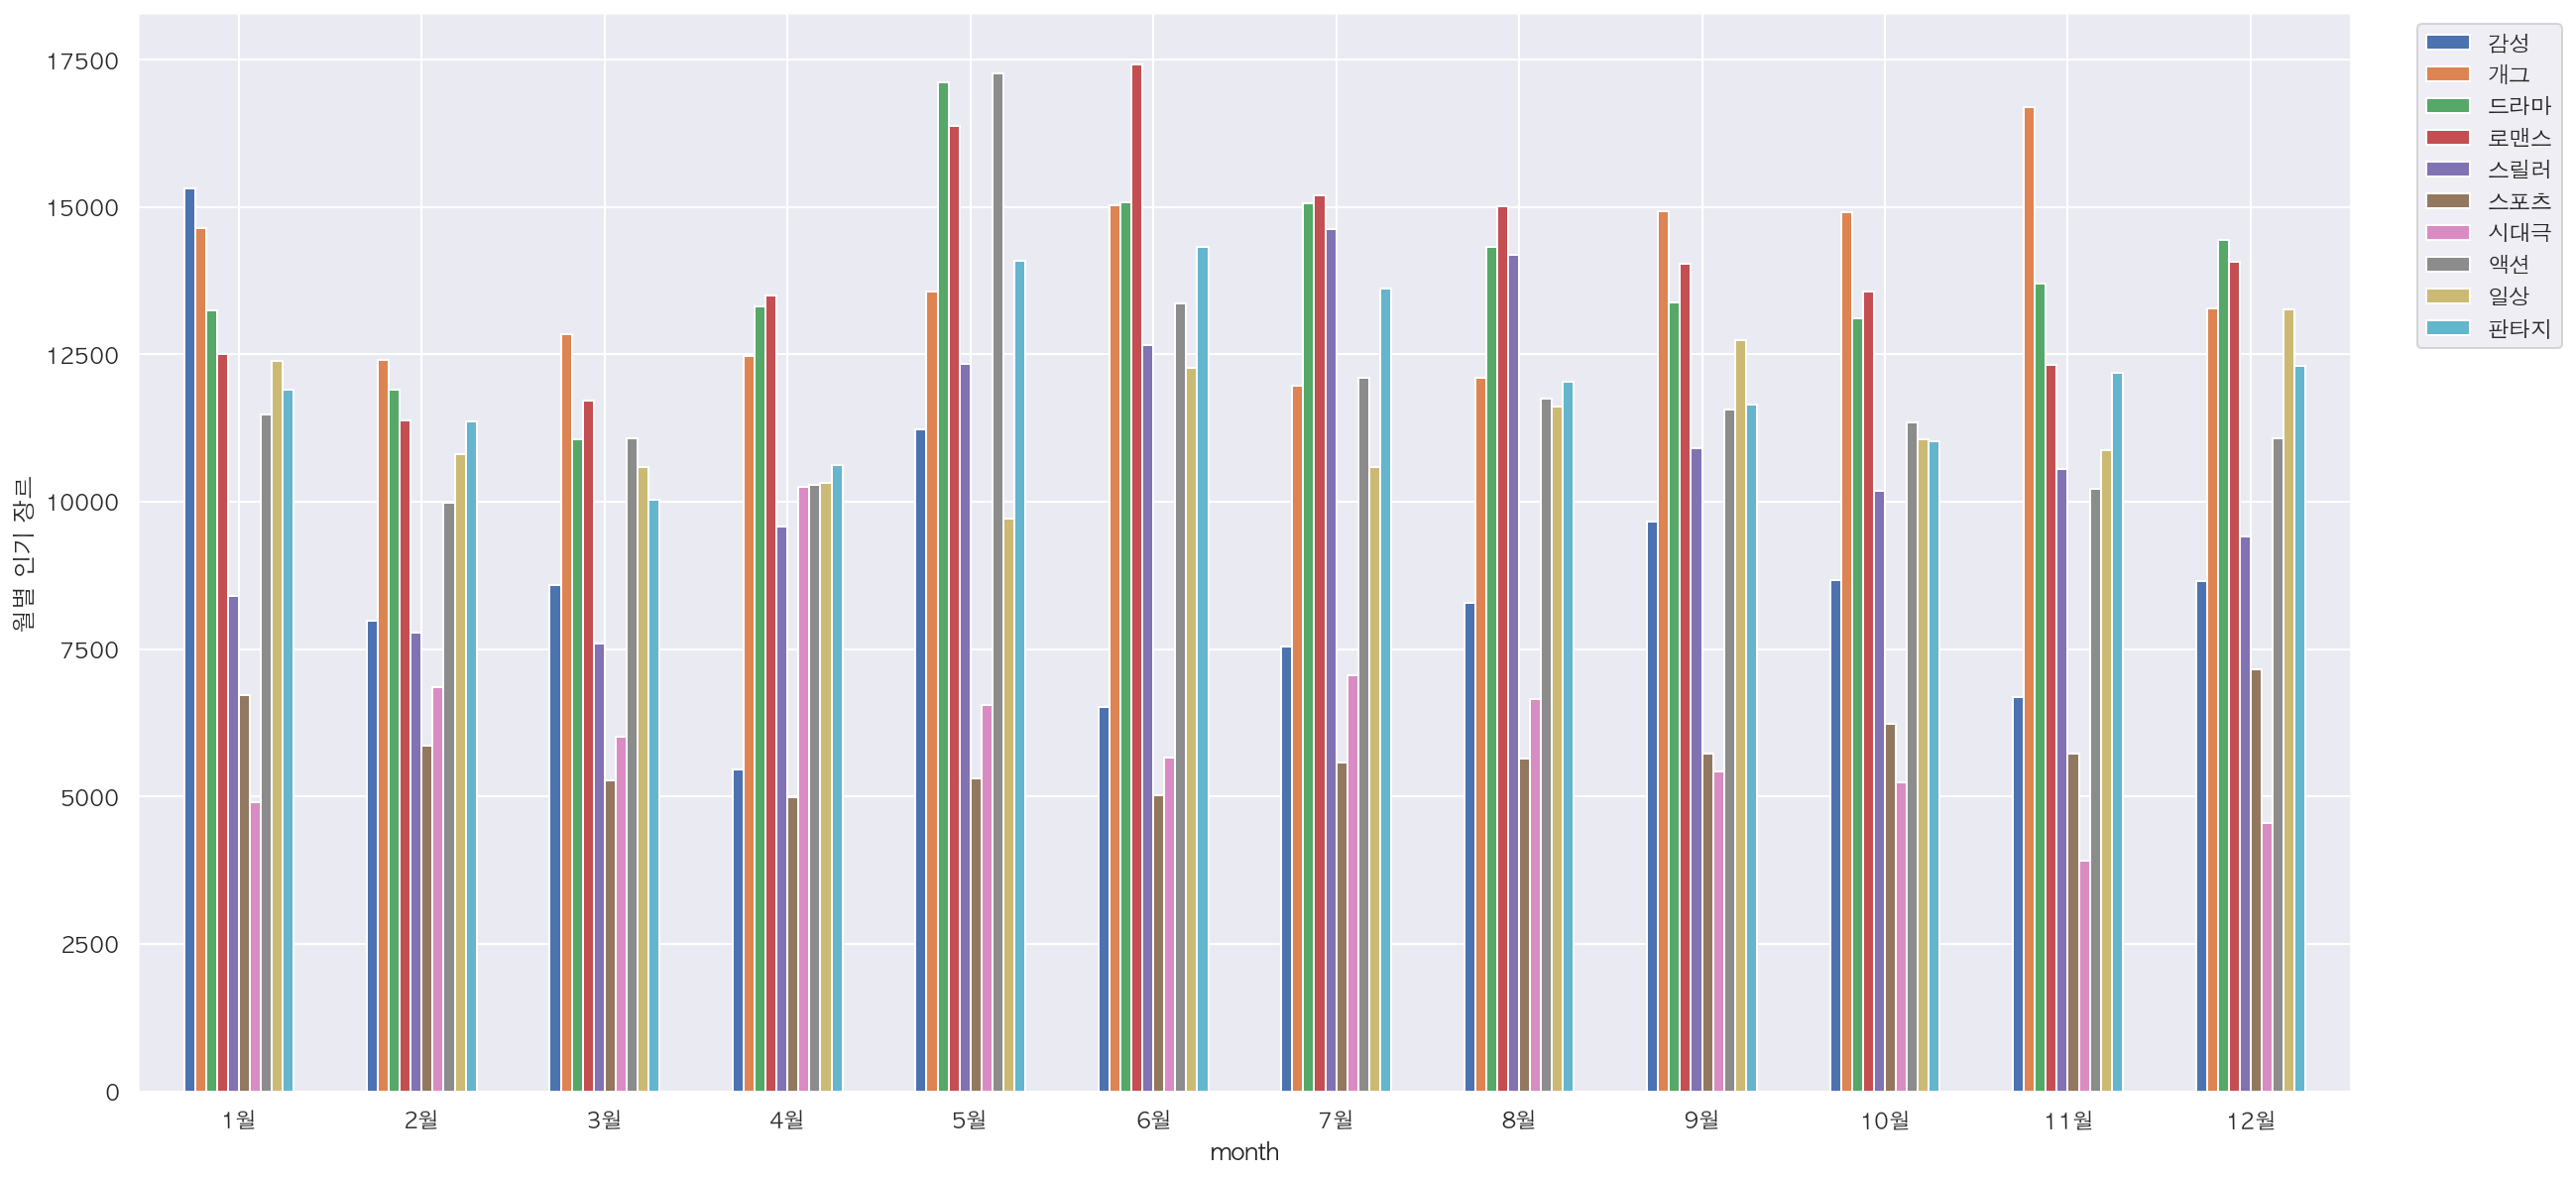

In [270]:
ax = month_df.T.plot(kind="bar", width=0.6)
fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_xlabel("month")
ax.set_ylabel("월별 인기 장르")
plt.xticks(rotation=1)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

In [272]:
month_df = month_df.T # 행 열 치환
month_df.index = month_df.index.str.replace("월", "")

value = []
genre = []
for i in range(len(month_df)):
    value.append(month_df.iloc[i].max()) # 행별 최대값
    genre.append(month_df.iloc[i].idxmax()) # 행별 최대값의 컬럼값
    
df = pd.DataFrame(
                {'value' : value,
                 'genre' : genre},
                    index = range(len(value))) # 인덱스설정
df["월"] = range(1,13)   # 월 컬럼 추가

In [273]:
df

,value,genre,월
0,15317.76,감성,1
1,12410.42,개그,2
2,12843.28,개그,3
3,13500.42,로맨스,4
4,17260.38,액션,5
5,17413.37,로맨스,6
6,15199.04,로맨스,7
7,15018.09,로맨스,8
8,14935.89,개그,9
9,14907.48,개그,10


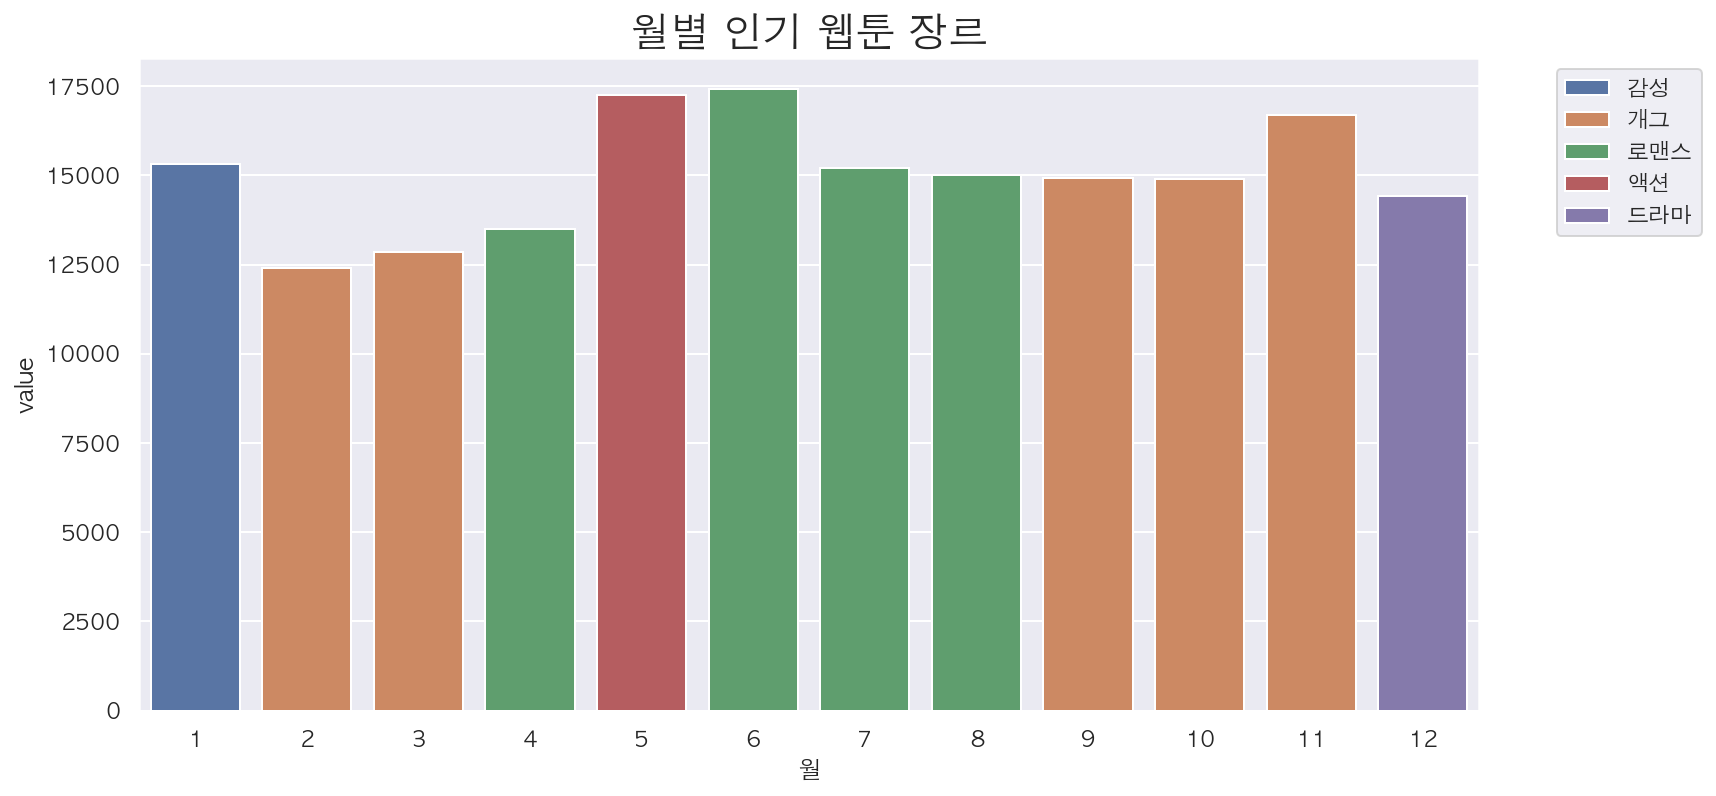

In [274]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='월', y ='value', hue='genre', dodge=False)
plt.title('월별 인기 웹툰 장르', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()